In [1]:
#importing libraries to read, visualize and understanding dataset
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#uploading dataset 
micro_cred_df=pd.read_csv('Micro_credit_loan.csv')

In [3]:
#finding insights of the dataset
micro_cred_df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [4]:
micro_cred_df.tail()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,17-06-2016
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,12-06-2016
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,29-07-2016
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,25-07-2016
209592,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,07-07-2016


In [5]:
#changing the column name to meaning full name so that one can undesrstand easily what the column conveys
micro_cred_df=micro_cred_df.rename(columns={"label":"status","msisdn":"Mobile_no","aon" :"No of days since joining","daily_decr30" : "30days_avg_amount","daily_decr90":"90_days_avg_amount","rental30":"30days_avg_balance", 
                              "rental90":"90days_avg_balance","last_rech_date_ma": "days_since_last_recharge", "last_rech_date_da": "days_since_last_data_recharge" , "last_rech_amt_ma" : "Last_recharge_amount",
                              "cnt_ma_rech30" : "No of recharge in last 30 days" , "fr_ma_rech30": "Frequency of recharge in last 30 days", "sumamnt_ma_rech30" : "total_recharge_amount_in_last_30_days",
                              "medianamnt_ma_rech30" : "median_of_main_accnt_recharge_in last _30days", "medianmarechprebal30" : "median_of_main_accnt_balance_in last _30days" , "cnt_ma_rech90" : "No of recharge in last 90 days" , 
                              "fr_ma_rech90": "Frequency of recharge in last 90 days", "sumamnt_ma_rech90" : "total_recharge_amount_in_last_90_days",
                              "medianamnt_ma_rech90" : "median_of_main_accnt_recharge_in last _90days", "medianmarechprebal90" : "median_of_main_accnt_balance_in last _90days" ,
                              "cnt_da_rech30" : " No of data recharge in last 30 days", "fr_da_rech30" : "Frequency of data_recharge in last 30 days", "cnt_da_rech90" : " No of data recharge in last 90 days", "fr_da_rech90" : "Frequency of data_recharge in last 90 days",
                              "cnt_loans30" : "No of loan taken in last 30 days", "amnt_loans30" : "Total loan amount in last 30days", "maxamnt_loans30":"max loan amount in last 30days", "medianamnt_loans30":"median of loan_amount in last 30 days",
                              "cnt_loans90" : "No of loan taken in last 90 days", "amnt_loans90" : "Total loan amount in last 90days", "maxamnt_loans90":"max loan amount in last 90days", "medianamnt_loans90":"median of loan_amount in last 90 days",
                              "pdate":"Joining_date"})

In [6]:
micro_cred_df.columns

Index(['status', 'Mobile_no', 'No of days since joining', '30days_avg_amount',
       '90_days_avg_amount', '30days_avg_balance', '90days_avg_balance',
       'days_since_last_recharge', 'days_since_last_data_recharge',
       'Last_recharge_amount', 'No of recharge in last 30 days',
       'Frequency of recharge in last 30 days',
       'total_recharge_amount_in_last_30_days',
       'median_of_main_accnt_recharge_in last _30days',
       'median_of_main_accnt_balance_in last _30days',
       'No of recharge in last 90 days',
       'Frequency of recharge in last 90 days',
       'total_recharge_amount_in_last_90_days',
       'median_of_main_accnt_recharge_in last _90days',
       'median_of_main_accnt_balance_in last _90days',
       ' No of data recharge in last 30 days',
       'Frequency of data_recharge in last 30 days',
       ' No of data recharge in last 90 days',
       'Frequency of data_recharge in last 90 days',
       'No of loan taken in last 30 days', 'Total loan amoun

# Attribute Information

In [7]:
micro_cred_df.shape

(209593, 36)

In [8]:
micro_cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   status                                         209593 non-null  int64  
 1   Mobile_no                                      209593 non-null  object 
 2   No of days since joining                       209593 non-null  float64
 3   30days_avg_amount                              209593 non-null  float64
 4   90_days_avg_amount                             209593 non-null  float64
 5   30days_avg_balance                             209593 non-null  float64
 6   90days_avg_balance                             209593 non-null  float64
 7   days_since_last_recharge                       209593 non-null  float64
 8   days_since_last_data_recharge                  209593 non-null  float64
 9   Last_recharge_amount                 

In [9]:
#checking for null values
micro_cred_df.isnull().sum()

status                                           0
Mobile_no                                        0
No of days since joining                         0
30days_avg_amount                                0
90_days_avg_amount                               0
30days_avg_balance                               0
90days_avg_balance                               0
days_since_last_recharge                         0
days_since_last_data_recharge                    0
Last_recharge_amount                             0
No of recharge in last 30 days                   0
Frequency of recharge in last 30 days            0
total_recharge_amount_in_last_30_days            0
median_of_main_accnt_recharge_in last _30days    0
median_of_main_accnt_balance_in last _30days     0
No of recharge in last 90 days                   0
Frequency of recharge in last 90 days            0
total_recharge_amount_in_last_90_days            0
median_of_main_accnt_recharge_in last _90days    0
median_of_main_accnt_balance_in

In [10]:
#finding the unique values presentr in the circle column
micro_cred_df['pcircle'].unique()

array(['UPW'], dtype=object)

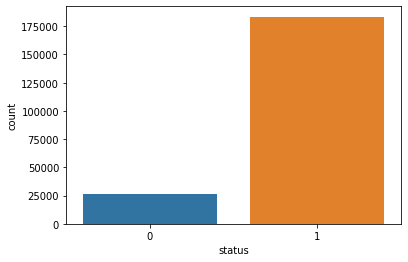

In [11]:
sns.countplot(micro_cred_df['status'])

In [12]:
micro_cred_df['status'].value_counts()

1    183431
0     26162
Name: status, dtype: int64

In [13]:
#This shows that the dataset is imbalanced as there is huge difference between the people who paid the loan and 
#who failed to pay the loan

Balancing the dataset

In [14]:
deafaulter=micro_cred_df[micro_cred_df["status"]==0]

In [15]:
Non_deafaulter=micro_cred_df[micro_cred_df["status"]==1].sample(n=26162,random_state=42)

In [16]:
deafaulter.shape, Non_deafaulter.shape

((26162, 36), (26162, 36))

In [17]:
cred_df=pd.concat([deafaulter,Non_deafaulter])

In [18]:
cred_df.head()

,status,Mobile_no,No of days since joining,30days_avg_amount,90_days_avg_amount,30days_avg_balance,90days_avg_balance,days_since_last_recharge,days_since_last_data_recharge,Last_recharge_amount,...,max loan amount in last 30days,median of loan_amount in last 30 days,No of loan taken in last 90 days,Total loan amount in last 90days,max loan amount in last 90days,median of loan_amount in last 90 days,payback30,payback90,pcircle,Joining_date
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,20-07-2016
11,0,82417I90848,82.0,65.166667,65.166667,326.20,326.20,17.0,0.0,7526,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,20-06-2016
15,0,24075I89239,1037.0,12.000000,12.000000,1216.80,1216.80,0.0,0.0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,24-06-2016
16,0,82053I85350,1583.0,1000.000000,1000.000000,1000.80,1087.88,0.0,0.0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,04-07-2016
21,0,75522I70784,378.0,514.693333,515.200000,56.26,58.20,2.0,0.0,773,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,01-07-2016


Text(0.5, 1.0, 'Balanced Countplot')

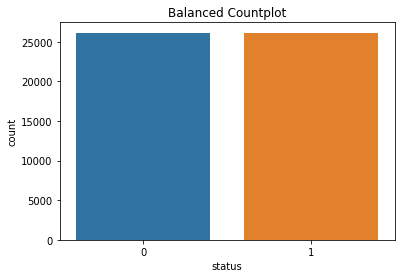

In [19]:
sns.countplot(cred_df['status'])
plt.title("Balanced Countplot")

# EDA: Expolatory data analysis

In [20]:
#dividing the 30days average balance  column into 4 sub_groups to find out some information about the users
average = [micro_cred_df]
for column in average:
    column.loc[column["30days_avg_balance"] <= 0,  'balance_group_30'] = 'no balance'
    column.loc[(column["30days_avg_balance"] > 0) & (column["30days_avg_balance"] <= 19766), 'balance_group_30'] = 'low balance'
    column.loc[(column["30days_avg_balance"] > 19766) & (column["30days_avg_balance"] <= 118572), 'balance_group_30'] = 'average balance'
    column.loc[(column["30days_avg_balance"] > 118572), 'balance_group_30'] = 'high balance'

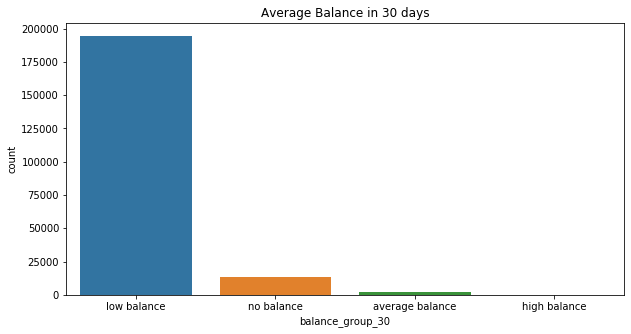

In [21]:
plt.figure(figsize=(10,5))
plt.title('Average Balance in 30 days')
sns.countplot(micro_cred_df['balance_group_30'])

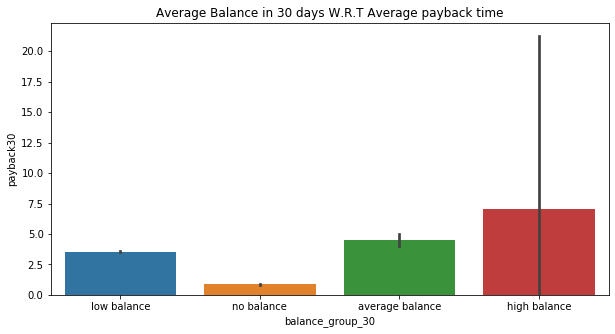

In [22]:
plt.figure(figsize=(10,5))
plt.title('Average Balance in 30 days W.R.T Average payback time')
sns.barplot(micro_cred_df['balance_group_30'], micro_cred_df['payback30'])

In [23]:
#dividing the 90days average balance  column into 4 sub_groups to find out some information about the users
avg = [micro_cred_df]
for column in avg:
    column.loc[column["90days_avg_balance"] <= 0,  'balance_group_90'] = 'no balance'
    column.loc[(column["90days_avg_balance"] > 0) & (column["90days_avg_balance"] <= 19766), 'balance_group_90'] = 'low balance'
    column.loc[(column["90days_avg_balance"] > 19766) & (column["90days_avg_balance"] <= 118572), 'balance_group_90'] = 'average balance'
    column.loc[(column["90days_avg_balance"] > 118572), 'balance_group_90'] = 'high balance'

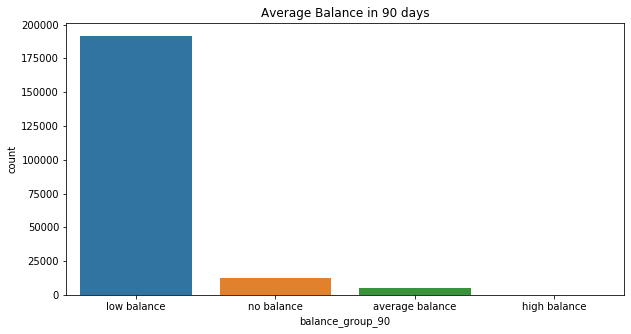

In [24]:
plt.figure(figsize=(10,5))
plt.title('Average Balance in 90 days')
sns.countplot(micro_cred_df['balance_group_90'])

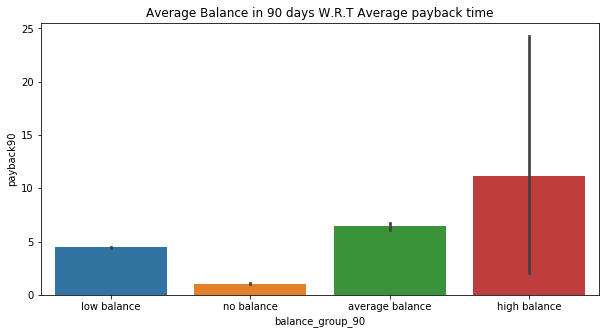

In [25]:
plt.figure(figsize=(10,5))
plt.title('Average Balance in 90 days W.R.T Average payback time')
sns.barplot(micro_cred_df['balance_group_90'], micro_cred_df['payback90'])

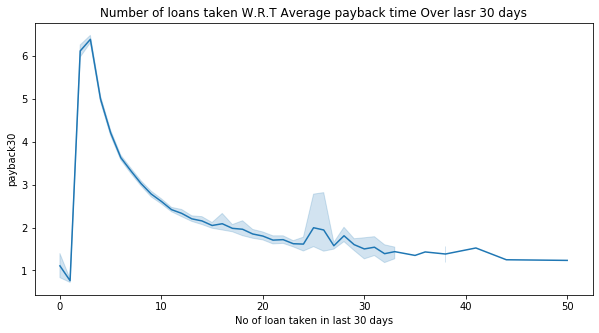

In [26]:
plt.figure(figsize=(10,5))
plt.title('Number of loans taken W.R.T Average payback time Over lasr 30 days')
sns.lineplot(micro_cred_df['No of loan taken in last 30 days'],micro_cred_df['payback30'])

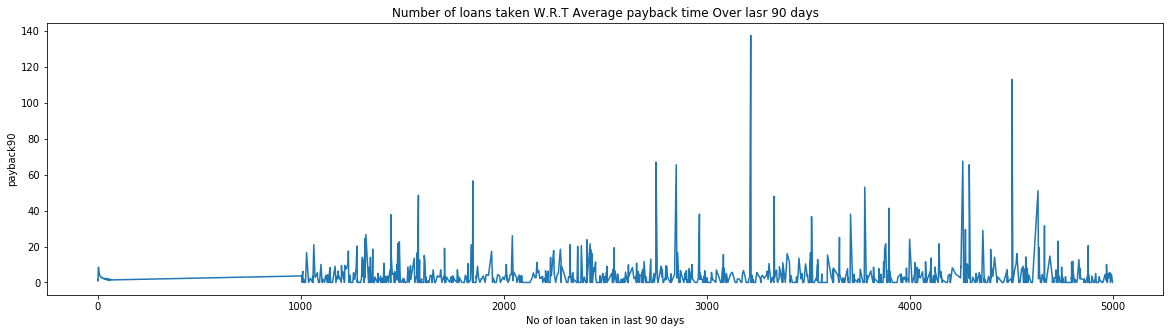

In [27]:
plt.figure(figsize=(20,5))
plt.title('Number of loans taken W.R.T Average payback time Over lasr 90 days')
sns.lineplot(micro_cred_df['No of loan taken in last 90 days'],micro_cred_df['payback90'])

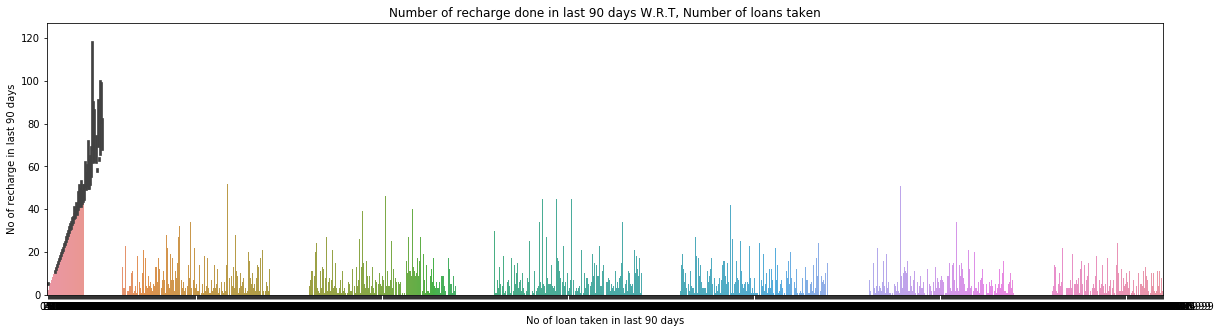

In [28]:
plt.figure(figsize=(20,5))
plt.title('Number of recharge done in last 90 days W.R.T, Number of loans taken')
sns.barplot(micro_cred_df['No of loan taken in last 90 days'],micro_cred_df['No of recharge in last 90 days'])

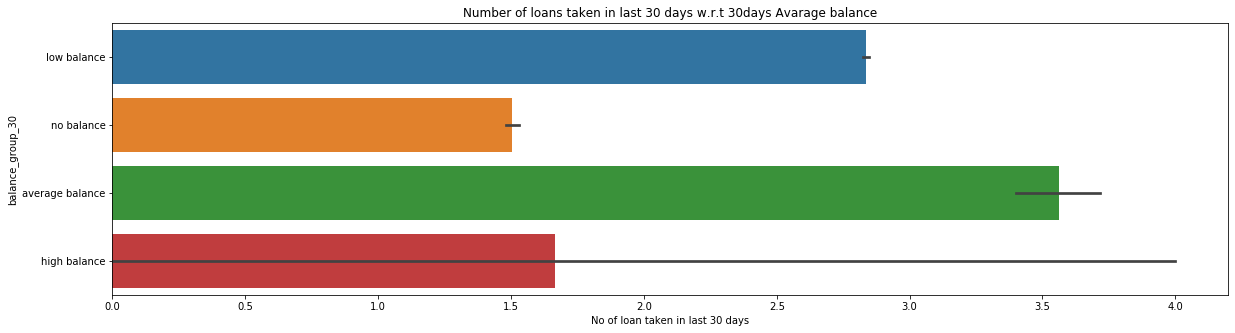

In [29]:
plt.figure(figsize=(20,5))
plt.title('Number of loans taken in last 30 days w.r.t 30days Avarage balance')
sns.barplot(micro_cred_df['No of loan taken in last 30 days'],micro_cred_df['balance_group_30'])

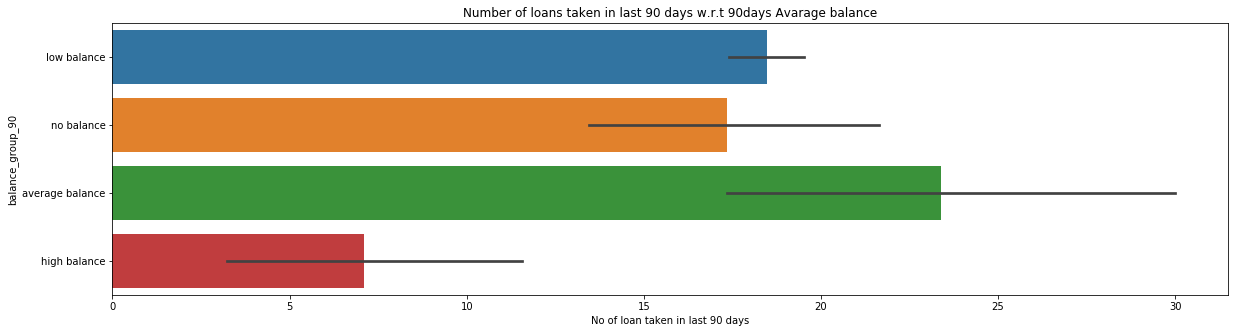

In [30]:
plt.figure(figsize=(20,5))
plt.title('Number of loans taken in last 90 days w.r.t 90days Avarage balance')
sns.barplot(micro_cred_df['No of loan taken in last 90 days'],micro_cred_df['balance_group_90'])

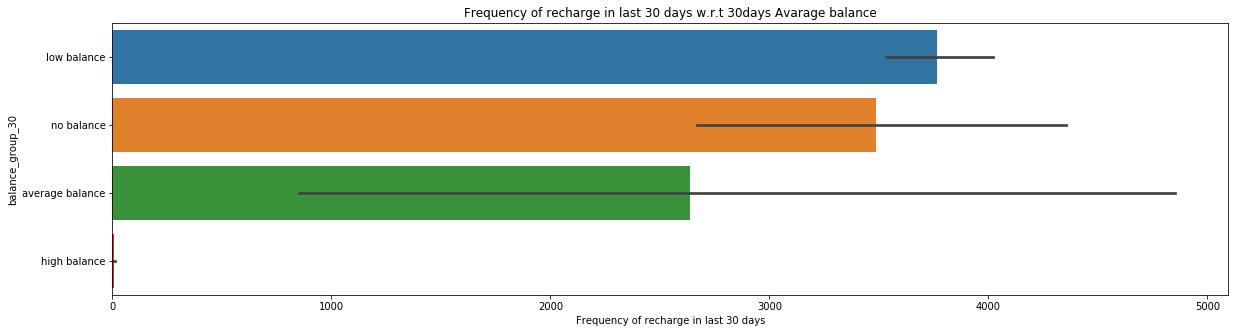

In [31]:
plt.figure(figsize=(20,5))
plt.title('Frequency of recharge in last 30 days w.r.t 30days Avarage balance')
sns.barplot(micro_cred_df['Frequency of recharge in last 30 days'],micro_cred_df['balance_group_30'])

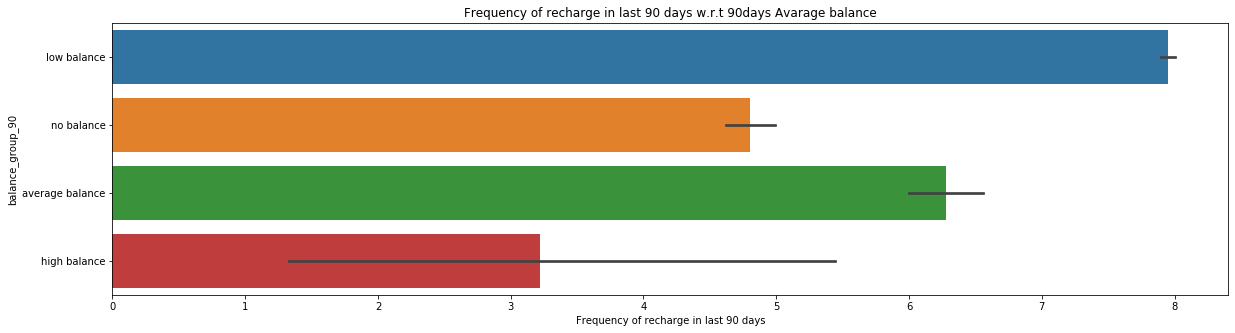

In [32]:
plt.figure(figsize=(20,5))
plt.title('Frequency of recharge in last 90 days w.r.t 90days Avarage balance')
sns.barplot(micro_cred_df['Frequency of recharge in last 90 days'],micro_cred_df['balance_group_90'])

In [33]:
micro_cred_df.columns

Index(['status', 'Mobile_no', 'No of days since joining', '30days_avg_amount',
       '90_days_avg_amount', '30days_avg_balance', '90days_avg_balance',
       'days_since_last_recharge', 'days_since_last_data_recharge',
       'Last_recharge_amount', 'No of recharge in last 30 days',
       'Frequency of recharge in last 30 days',
       'total_recharge_amount_in_last_30_days',
       'median_of_main_accnt_recharge_in last _30days',
       'median_of_main_accnt_balance_in last _30days',
       'No of recharge in last 90 days',
       'Frequency of recharge in last 90 days',
       'total_recharge_amount_in_last_90_days',
       'median_of_main_accnt_recharge_in last _90days',
       'median_of_main_accnt_balance_in last _90days',
       ' No of data recharge in last 30 days',
       'Frequency of data_recharge in last 30 days',
       ' No of data recharge in last 90 days',
       'Frequency of data_recharge in last 90 days',
       'No of loan taken in last 30 days', 'Total loan amoun

In [34]:
#dropping the columns which are not necessary for the model building 
micro_cred_df.drop([' No of data recharge in last 30 days','Frequency of data_recharge in last 30 days',
                    ' No of data recharge in last 90 days','Frequency of data_recharge in last 90 days',
                    'max loan amount in last 30days','median of loan_amount in last 30 days','max loan amount in last 90days',
                    'median of loan_amount in last 90 days','Mobile_no','balance_group_30','balance_group_90','Joining_date','pcircle','days_since_last_data_recharge'],axis=1,inplace=True)



In [35]:
#dropping the columns from the balanced dataset
cred_df.drop([' No of data recharge in last 30 days','Frequency of data_recharge in last 30 days',
                    ' No of data recharge in last 90 days','Frequency of data_recharge in last 90 days',
                    'max loan amount in last 30days','median of loan_amount in last 30 days','max loan amount in last 90days',
                    'median of loan_amount in last 90 days','Mobile_no','Joining_date','pcircle','days_since_last_data_recharge'],axis=1,inplace=True)


# Statistical Analysis

In [36]:
micro_cred_df.describe()

,status,No of days since joining,30days_avg_amount,90_days_avg_amount,30days_avg_balance,90days_avg_balance,days_since_last_recharge,Last_recharge_amount,No of recharge in last 30 days,Frequency of recharge in last 30 days,...,Frequency of recharge in last 90 days,total_recharge_amount_in_last_90_days,median_of_main_accnt_recharge_in last _90days,median_of_main_accnt_balance_in last _90days,No of loan taken in last 30 days,Total loan amount in last 30days,No of loan taken in last 90 days,Total loan amount in last 90days,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,2064.452797,3.978057,3737.355121,...,7.716780,12396.218352,1864.595821,92.025541,2.758981,17.952021,18.520919,23.645398,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,2370.786034,4.256090,53643.625172,...,12.590251,16857.793882,2081.680664,369.215658,2.554502,17.379741,224.797423,26.469861,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,770.000000,1.000000,0.000000,...,0.000000,2317.000000,773.000000,14.600000,1.000000,6.000000,1.000000,6.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,1539.000000,3.000000,2.000000,...,2.000000,7226.000000,1539.000000,36.000000,2.000000,12.000000,2.000000,12.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,2309.000000,5.000000,6.000000,...,8.000000,16000.000000,1924.000000,79.310000,4.000000,24.000000,5.000000,30.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,55000.000000,203.000000,999606.368100,...,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,4997.517944,438.000000,171.500000,171.500000


In [37]:
Cor=micro_cred_df.corr()

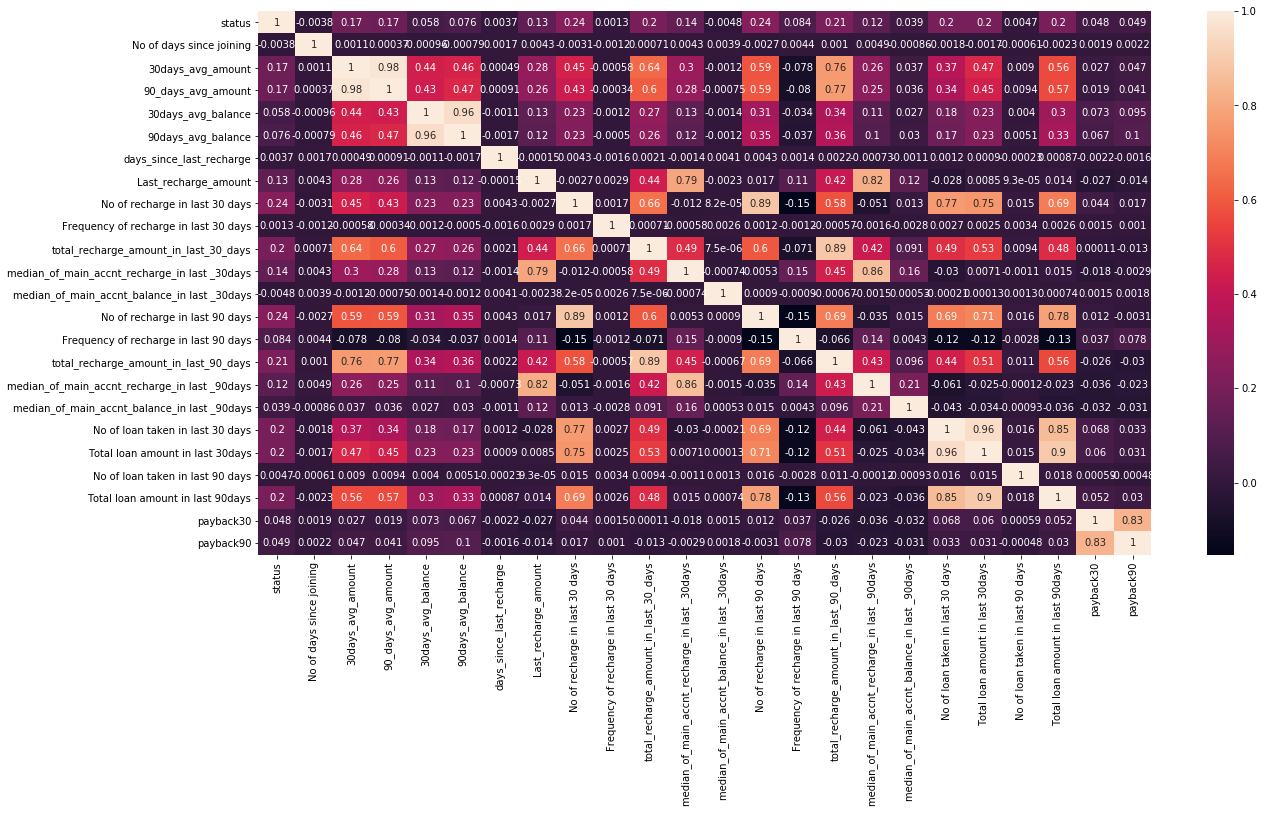

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(Cor,annot=True) 

In [39]:
#checking th skewness of the dataset
micro_cred_df.skew()

status                                           -2.270254
No of days since joining                         10.392949
30days_avg_amount                                 3.946230
90_days_avg_amount                                4.252565
30days_avg_balance                                4.521929
90days_avg_balance                                4.437681
days_since_last_recharge                         14.790974
Last_recharge_amount                              3.781149
No of recharge in last 30 days                    3.283842
Frequency of recharge in last 30 days            14.772833
total_recharge_amount_in_last_30_days             6.386787
median_of_main_accnt_recharge_in last _30days     3.512324
median_of_main_accnt_balance_in last _30days     14.779875
No of recharge in last 90 days                    3.425254
Frequency of recharge in last 90 days             2.285423
total_recharge_amount_in_last_90_days             4.897950
median_of_main_accnt_recharge_in last _90days     3.7527

#The dataset is highly skewed

# Statistical Analysis for Balanced dataset

In [40]:
#Chekin for the Balanced dataset
cred_df.describe()

,status,No of days since joining,30days_avg_amount,90_days_avg_amount,30days_avg_balance,90days_avg_balance,days_since_last_recharge,Last_recharge_amount,No of recharge in last 30 days,Frequency of recharge in last 30 days,...,Frequency of recharge in last 90 days,total_recharge_amount_in_last_90_days,median_of_main_accnt_recharge_in last _90days,median_of_main_accnt_balance_in last _90days,No of loan taken in last 30 days,Total loan amount in last 30days,No of loan taken in last 90 days,Total loan amount in last 90days,payback30,payback90
count,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,...,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000
mean,0.500000,8342.073910,3635.699648,4039.575963,2406.596926,2984.531186,3236.405488,1700.946468,2.864135,3628.191577,...,6.427184,8514.288395,1576.779833,76.808025,2.205088,14.155340,17.119938,17.771462,2.918014,3.742255
std,0.500005,76729.059869,7537.505112,8819.462804,4066.355423,5189.697755,50167.927882,2280.567717,3.788624,52819.833764,...,12.175837,14180.506849,2084.003707,441.419147,2.216448,14.955379,221.853191,22.369705,9.268320,10.785095
min,0.000000,-48.000000,-93.012667,-93.012667,-7786.750000,-7786.750000,-29.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,211.000000,12.414000,12.666667,169.135000,183.300000,1.000000,770.000000,0.000000,0.000000,...,0.000000,773.000000,770.000000,1.000000,1.000000,6.000000,1.000000,6.000000,0.000000,0.000000
50%,0.500000,474.000000,518.868500,524.080000,876.430000,1027.460000,3.000000,773.000000,2.000000,0.000000,...,1.000000,3509.500000,947.000000,25.000000,1.000000,6.000000,1.000000,6.000000,0.000000,0.000000
75%,1.000000,915.000000,3873.570833,3994.595000,2862.667500,3500.442500,8.000000,1547.000000,4.000000,4.000000,...,6.000000,10351.750000,1547.000000,64.000000,3.000000,18.000000,3.000000,18.000000,2.666667,3.500000
max,1.000000,999215.597100,173834.000000,207595.960000,82461.120000,126887.690000,997676.760100,55000.000000,78.000000,994205.818000,...,87.000000,325874.000000,55000.000000,27611.700000,44.000000,276.000000,4992.821587,408.000000,170.500000,170.500000


In [41]:
Corr=cred_df.corr()

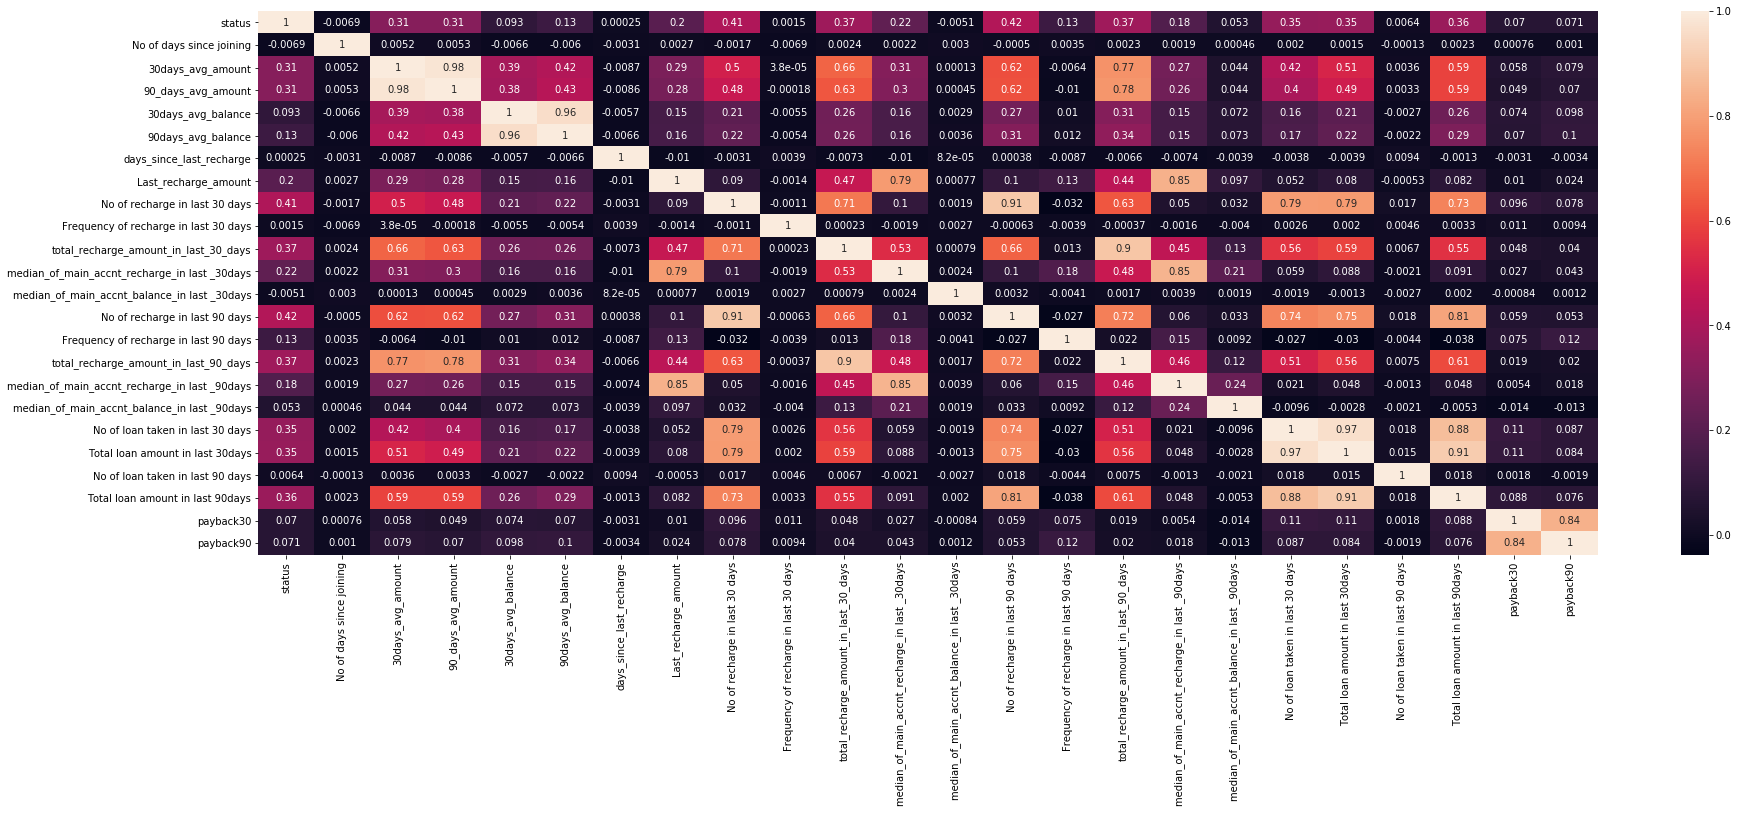

In [42]:
plt.figure(figsize=(30,10))
sns.heatmap(Corr,annot=True) 

In [43]:
#checking th skewness of the dataset
cred_df.skew()

status                                            0.000000
No of days since joining                         10.149681
30days_avg_amount                                 4.566536
90_days_avg_amount                                5.027095
30days_avg_balance                                4.003830
90days_avg_balance                                4.113406
days_since_last_recharge                         15.994263
Last_recharge_amount                              5.332335
No of recharge in last 30 days                    3.317824
Frequency of recharge in last 30 days            14.970458
total_recharge_amount_in_last_30_days             4.306342
median_of_main_accnt_recharge_in last _30days     5.046703
median_of_main_accnt_balance_in last _30days     14.037491
No of recharge in last 90 days                    3.764509
Frequency of recharge in last 90 days             2.601794
total_recharge_amount_in_last_90_days             4.762961
median_of_main_accnt_recharge_in last _90days     5.7926

# Removing outliers and skewness from the dataset

In [44]:
from scipy.stats import zscore

In [45]:
z=np.abs(zscore(micro_cred_df))
print(z)

[[2.64789583 0.10357685 0.25229941 ... 0.43995041 2.9046997  2.39409346]
 [0.37765836 0.09776412 0.73103667 ... 0.43995041 0.38562959 0.41923266]
 [0.37765836 0.10010243 0.43201111 ... 0.66662385 0.38562959 0.41923266]
 ...
 [0.37765836 0.09378769 0.70079045 ... 1.14676363 0.06820893 0.04735622]
 [0.37765836 0.08428915 0.77075515 ... 0.01339646 0.38562959 0.59938541]
 [0.37765836 0.08628398 0.09674426 ... 0.21327698 0.38562959 0.41923266]]


In [46]:
threhold=3

In [47]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([    21,     22,     22, ..., 209580, 209581, 209586], dtype=int64), array([14, 14, 23, ..., 16,  3, 21], dtype=int64))


In [48]:
z[22][14] #checking the above output result 

4.629245062683489

In [49]:
micro_cred_new=micro_cred_df[(z<3).all(axis=1)]  #removing outliers

In [50]:
print("Number of rows and columns present in dataset before removing outliers",micro_cred_df.shape)
print("\n \n")
print("Number of rows and columns present in dataset after removing outliers",micro_cred_new.shape)

Number of rows and columns present in dataset before removing outliers (209593, 24)

 

Number of rows and columns present in dataset after removing outliers (173608, 24)


# Applying zscore in Balanced dataset

In [51]:
#applying zscore onj Balanced dataset
zz=np.abs(zscore(cred_df))
print(zz)

[[1.         0.10517724 0.07703546 ... 0.25800598 2.8141275  2.34193461]
 [1.         0.10765351 0.47370676 ... 0.52622844 0.31484038 0.34698725]
 [1.         0.095207   0.48076044 ... 0.52622844 0.31484038 0.34698725]
 ...
 [1.         0.10405641 0.47980521 ... 0.01021649 0.33253228 0.20934141]
 [1.         0.0991169  1.06538927 ... 0.27843895 0.31484038 0.88929866]
 [1.         0.09958609 0.61616472 ... 0.01021649 1.46543444 1.18291657]]


In [52]:
threhold=3

In [53]:
print(np.where(zz>3))#printing all the value position which are greater than the threshold value

(array([    4,    13,    23, ..., 52317, 52318, 52319], dtype=int64), array([14,  5, 11, ..., 10,  6, 17], dtype=int64))


In [54]:
zz[4][14] #checking the above output result 

4.728493419815594

In [55]:
cred_new=cred_df[(zz<3).all(axis=1)]  #removing outliers

In [56]:
print("Number of rows and columns present in dataset before removing outliers",cred_df.shape)
print("\n \n")
print("Number of rows and columns present in dataset after removing outliers",cred_new.shape)

Number of rows and columns present in dataset before removing outliers (52324, 24)

 

Number of rows and columns present in dataset after removing outliers (42315, 24)


In [57]:
#cheking skewness after removing outliers
micro_cred_new.skew()

status                                           -2.137698
No of days since joining                          0.956737
30days_avg_amount                                 1.951274
90_days_avg_amount                                2.062553
30days_avg_balance                                2.177468
90days_avg_balance                                2.218779
days_since_last_recharge                          3.075067
Last_recharge_amount                              2.105901
No of recharge in last 30 days                    1.195127
Frequency of recharge in last 30 days             2.002024
total_recharge_amount_in_last_30_days             1.643258
median_of_main_accnt_recharge_in last _30days     2.307818
median_of_main_accnt_balance_in last _30days     10.711546
No of recharge in last 90 days                    1.334891
Frequency of recharge in last 90 days             1.976786
total_recharge_amount_in_last_90_days             1.709863
median_of_main_accnt_recharge_in last _90days     2.3471

In [58]:
#cheking the skewness after removing outliers from the balanced dataset
cred_new.skew()

status                                           0.163470
No of days since joining                         1.078372
30days_avg_amount                                2.555095
90_days_avg_amount                               2.716915
30days_avg_balance                               2.285519
90days_avg_balance                               2.290819
days_since_last_recharge                         2.987688
Last_recharge_amount                             2.148242
No of recharge in last 30 days                   1.520627
Frequency of recharge in last 30 days            2.349185
total_recharge_amount_in_last_30_days            1.933923
median_of_main_accnt_recharge_in last _30days    1.716694
median_of_main_accnt_balance_in last _30days     6.566654
No of recharge in last 90 days                   1.689700
Frequency of recharge in last 90 days            2.353533
total_recharge_amount_in_last_90_days            2.076228
median_of_main_accnt_recharge_in last _90days    1.862062
median_of_main

In [59]:
#As there  is not much skewness present in the dataset keeping the dataset as it is after removing the outliers

# Splitting The data into training and testing sets

In [74]:
#dividing the dataset into dependent and independent features
x=micro_cred_new.iloc[:,1:]
y=micro_cred_new.iloc[:,0]

In [75]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)


In [76]:
x=df_x
print(x)

[[-0.75226841 -0.13270241 -0.17681829 ... -0.43949038  6.29154964
   5.23648643]
 [ 0.13305     1.4681453   1.22438653 ... -0.43949038 -0.60799781
  -0.63649872]
 [-0.22308945 -0.42526878 -0.43466838 ... -0.77514966 -0.60799781
  -0.63649872]
 ...
 [ 0.73868828  1.41890518  1.19029832 ...  1.91012456  0.34366391
   0.13981541]
 [ 2.18537905  1.53280605  1.2939271  ...  0.23182817 -0.60799781
   1.48992694]
 [ 1.88155386  0.12053767  0.05048851 ... -0.1038311  -0.60799781
  -0.63649872]]


In [77]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

In [78]:
#Finding the best random_state
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    t=lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    #print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate) 

The maximum Accuracy_score is  0.871641859822128 at random state 90


In [79]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=90)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(130206, 23) (43402, 23) (130206,) (43402,)


In [80]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [ ]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_


In [ ]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


In [83]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.871641859822128


CROSS_VAL_SCORE = 0.8672757009792328


ROC_AUC_SCORE = 0.5334515050223317


 
 Classification Report 
                precision    recall  f1-score   support

           0       0.58      0.08      0.13      5692
           1       0.88      0.99      0.93     37710

    accuracy                           0.87     43402
   macro avg       0.73      0.53      0.53     43402
weighted avg       0.84      0.87      0.83     43402



[[  427  5265]
 [  306 37404]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None,

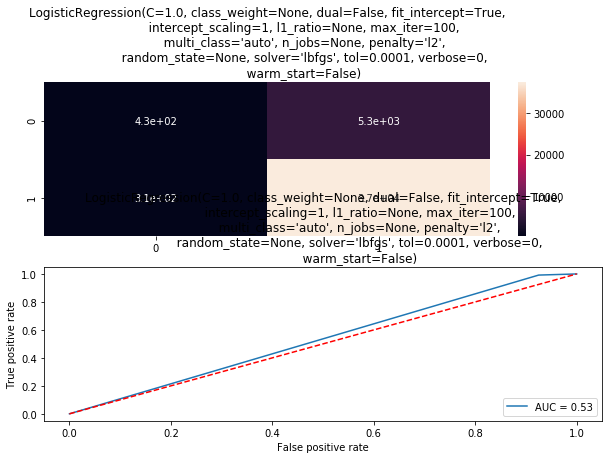

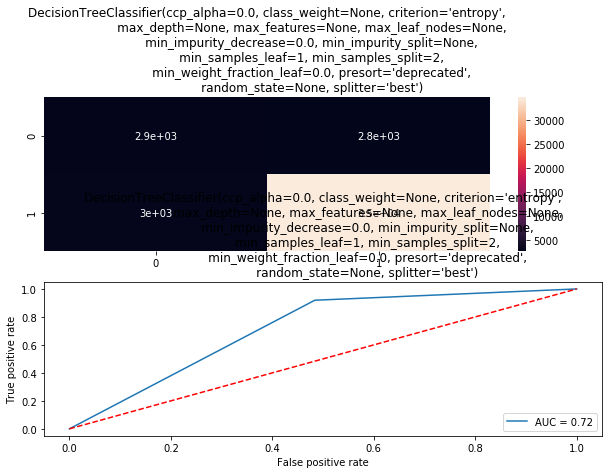

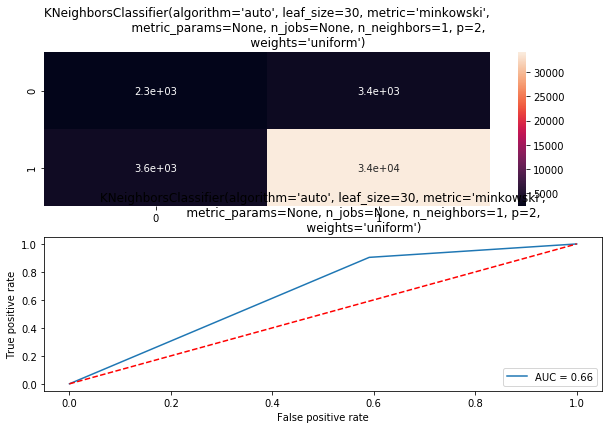

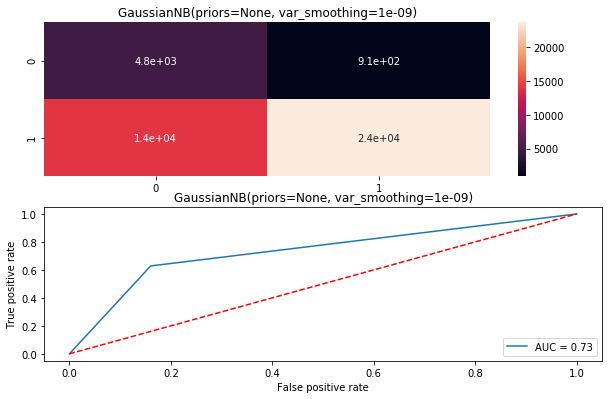

In [84]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='entropy'),KNeighborsClassifier(n_neighbors=1),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          

    

In [85]:
outcome=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB'],'Accuracy_Score':[0.8716,0.8663,0.8391,0.6560],'Cross_Val_Sore':[0.8672,0.8627,0.8367,0.6532],'Roc_Auc_Score':[0.5334,0.7177,0.6565,0.340]})
outcome

,Model,Accuracy_Score,Cross_Val_Sore,Roc_Auc_Score
0,LogisticRegression,0.8716,0.8672,0.5334
1,DecisionTreeClassifier,0.8663,0.8627,0.7177
2,KNeighborsClassifier,0.8391,0.8367,0.6565
3,GaussianNB,0.6560,0.6532,0.3400


In [87]:
lg=LogisticRegression(penalty='l2')
lg.fit(x_train,y_train)
prediction=lg.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(lg,x,y,cv=5,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.871641859822128
The Cross Val Score = 0.8671777789035406


In [95]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=lg, n_estimators=500,random_state=0)
ada.fit(x_train,y_train)
print(ada.score(x_train,y_train))
pred=ada.predict(x_test)
print("Predicted result",pred)
print("\n \n")
print("Actual Result \n",y_test)

acc_score=accuracy_score(y_test,pred)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(lrg,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

0.8643226886625809
Predicted result [1 1 1 ... 1 1 1]

 

Actual Result 
 79060     1
58974     1
104791    1
187267    1
129824    1
         ..
82682     1
74322     1
136446    1
136968    1
204859    1
Name: status, Length: 43402, dtype: int64
Accuracy Score = 0.8694069397723607
The Cross Val Score = 0.8672757009792328


In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
rfc.fit(x_train,y_train)
print(rfc.score(x_train,y_train))
rfcpred=rfc.predict(x_test)
acc_score=accuracy_score(y_test,rfcpred)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(rfc,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

0.9995852725680844
Accuracy Score = 0.9108336021381503
The Cross Val Score = 0.9078441071239446


In [97]:
#Hence it is observed that Random Forest classifier is giving a good result, therefore finalizing it

In [98]:
from sklearn.externals import joblib
joblib.dump(rfc,"rfc_Micro_credit.pkl")

['rfc_Micro_credit.pkl']

# Applying Machine learning on balanced dataset

In [99]:
#dividing the dataset into dependent and independent features
x1=cred_new.iloc[:,1:]
y1=cred_new.iloc[:,0]

In [100]:
#Scaling the data in x1
df_x1=sc.fit_transform(x1)
x1=df_x1
print(x1)

[[-0.65339644  0.21551775  0.15456002 ... -0.15455918  6.35695346
   5.3283569 ]
 [-1.0439385  -0.53700239 -0.51921111 ... -0.60334609 -0.4576856
  -0.48332379]
 [ 0.91904923 -0.55038385 -0.5311519  ... -0.60334609 -0.4576856
  -0.48332379]
 ...
 [-0.47662477 -0.54857169 -0.52953484 ...  0.29422773  0.95223972
   0.7190929 ]
 [ 0.30240387  2.38279739  2.77049321 ...  0.74301465 -0.4576856
   2.18871331]
 [ 0.22840642  1.53057912  1.32577165 ...  0.29422773  3.41960904
   2.82332212]]


In [101]:
#Finding the best random_state
max_score=0
final_rstate=0

for i in range(42,101):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    lrg=LogisticRegression()
    lrg.fit(x1_train,y1_train)
    t1=lrg.score(x1_train,y1_train)
    prediction=lrg.predict(x1_test)
    acc_score=accuracy_score(y1_test,prediction)
    #print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate) 

The maximum Accuracy_score is  0.7732299839304282 at random state 45


In [102]:
#finalizing the train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=45)
print(x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape)

(31736, 23) (10579, 23) (31736,) (10579,)


In [103]:
# Testing the Algorithms and finding the the best parameters using Grid Search cv

In [104]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x1_train,y1_train)
gd.best_params_

{'penalty': 'l2'}

In [ ]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x1_train,y1_train)
gd.best_params_


In [ ]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x1_train,y1_train)
gd.best_params_


In [105]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x1_train,y1_train)
gd.best_params_

{'criterion': 'entropy'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.7732299839304282


CROSS_VAL_SCORE = 0.7635592556783378


ROC_AUC_SCORE = 0.7674023908075158


 
 Classification Report 
                precision    recall  f1-score   support

           0       0.76      0.84      0.80      5721
           1       0.79      0.70      0.74      4858

    accuracy                           0.77     10579
   macro avg       0.78      0.77      0.77     10579
weighted avg       0.77      0.77      0.77     10579



[[4799  922]
 [1477 3381]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, ma

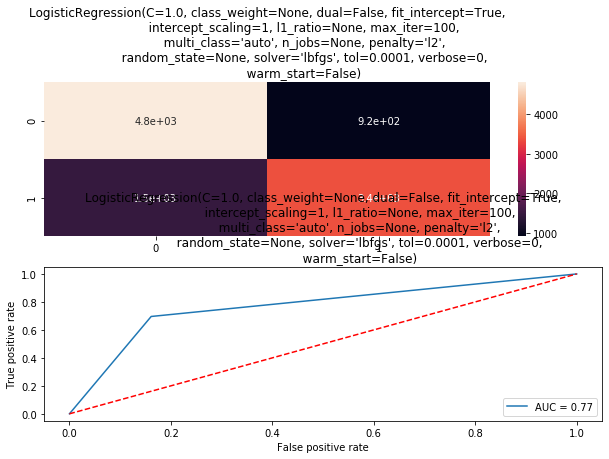

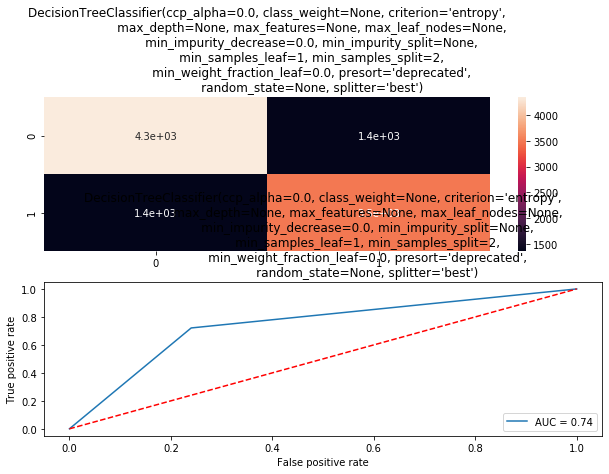

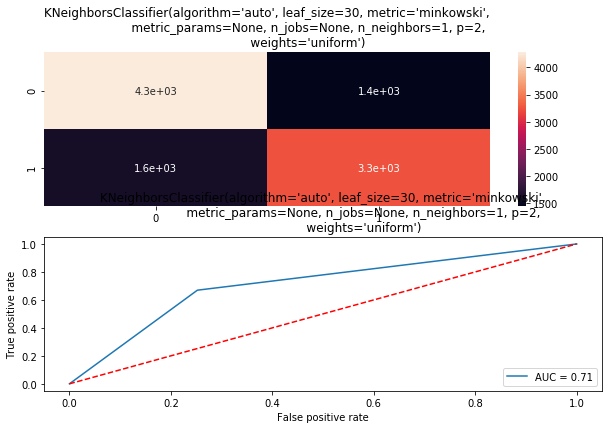

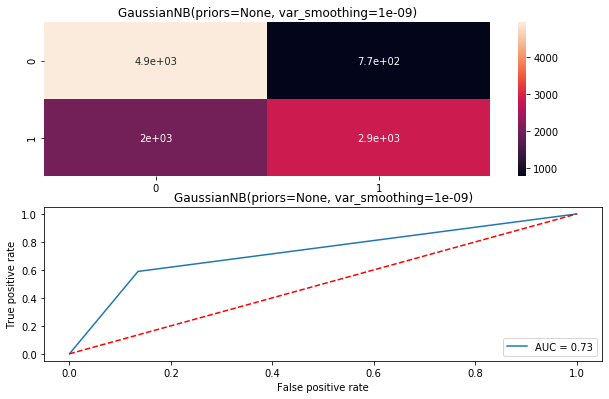

In [108]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='entropy'),KNeighborsClassifier(n_neighbors=1),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x1_train,y1_train)
    print(models)
    prediction=models.predict(x1_test)
    print("\n")
    acc_score=accuracy_score(y1_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x1,y1,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y1_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y1_test,prediction))
    print("\n")
    cm=confusion_matrix(y1_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          

    

In [109]:
outcome=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB'],'Accuracy_Score':[0.7732,0.7421,0.7117,0.7381],'Cross_Val_Sore':[0.7635,0.7417,0.7080,0.7340],'Roc_Auc_Score':[0.7674,0.7405,0.7085,0.7269]})
outcome

,Model,Accuracy_Score,Cross_Val_Sore,Roc_Auc_Score
0,LogisticRegression,0.7732,0.7635,0.7674
1,DecisionTreeClassifier,0.7421,0.7417,0.7405
2,KNeighborsClassifier,0.7117,0.7080,0.7085
3,GaussianNB,0.7381,0.7340,0.7269


In [110]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=lg, n_estimators=500,random_state=0)
ada.fit(x1_train,y1_train)
print(ada.score(x1_train,y1_train))
pred=ada.predict(x1_test)
print("Predicted result",pred)
print("\n \n")
print("Actual Result \n",y1_test)

acc_score=accuracy_score(y1_test,pred)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(lrg,x1,y1,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

0.7584446685152508
Predicted result [0 0 1 ... 0 0 1]

 

Actual Result 
 92272     0
72714     0
192611    1
97511     1
131935    0
         ..
104386    1
41366     1
153101    0
11060     0
19709     0
Name: status, Length: 10579, dtype: int64
Accuracy Score = 0.7673693165705643
The Cross Val Score = 0.7635592556783378


In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
rfc.fit(x1_train,y1_train)
print(rfc.score(x1_train,y1_train))
rfcpred=rfc.predict(x1_test)
acc_score=accuracy_score(y1_test,rfcpred)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(rfc,x1,y1,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

0.9996849004285354
Accuracy Score = 0.8177521504868135
The Cross Val Score = 0.812784994765881


In [113]:
#Hence it is observed that Random Forest classifier is giving a good result, therefore finalizing it

In [114]:
from sklearn.externals import joblib
joblib.dump(rfc,"rfc_Balanced_dataset_micro_credit.pkl")

['rfc_Balanced_dataset_micro_credit.pkl']